In [1]:
import yfinance as yf

ModuleNotFoundError: No module named 'yfinance'

In [2]:
!pip install yfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 17.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 16.9 MB/s eta 0:00:00a 0:00:01
  Created wheel for peewee: filename=peewee-3.17.6-py3-none-any.whl size=138891 sha256=5879e3a6597d57329dc8f41ed81a0b963996c0b029351cf8b6904cde5ffbbaf3
  Stored in directory: /Users/sushanth.c/Library/Caches/pip/wheels/a6/5e/0f/8319805c4115320e0d3e8fb5799b114a2e4c4a3d6c7e523b06
Successfully built peewee


In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


ModuleNotFoundError: No module named 'sklearn'

In [4]:
!pip install scikit-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 15.6 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 13.9 MB/s eta 0:00:0000:0100:01


In [5]:
!pip install tensorflow


In [6]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [8]:

data = yf.download('NVDA', start='2016-01-01', end='2024-01-01')


data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,0.80725,0.81450,0.80100,0.80925,0.789926,358076000
2016-01-05,0.82450,0.83600,0.81250,0.82225,0.802615,490272000
2016-01-06,0.80875,0.81250,0.77900,0.78825,0.769427,449344000
2016-01-07,0.76850,0.77375,0.74700,0.75700,0.738923,645304000
2016-01-08,0.76675,0.76750,0.73925,0.74075,0.723062,398472000


In [9]:
# Use the 'Close' price for prediction
close_prices = data['Close'].values
close_prices = close_prices.reshape(-1, 1)

# Scale the data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create training data (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]


In [10]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

# Create training and testing datasets
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape data to fit LSTM input format (samples, time steps, features)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [11]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0127
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.1678e-04
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 3.2863e-04
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.1052e-04
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3.3583e-04
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.8478e-04
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.4779e-04
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.6556e-04
Epoch 9/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.1861e-04
Epoch 10/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 2.2194e-04
Epoch 11/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.8466e-04
Epoch 12/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7611e-04
Epoch 13/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 1.7052e-04
Epoch 14/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 1.5411e-04
Epoch 15/20
49/49 ━━━━━━━━━━━━

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


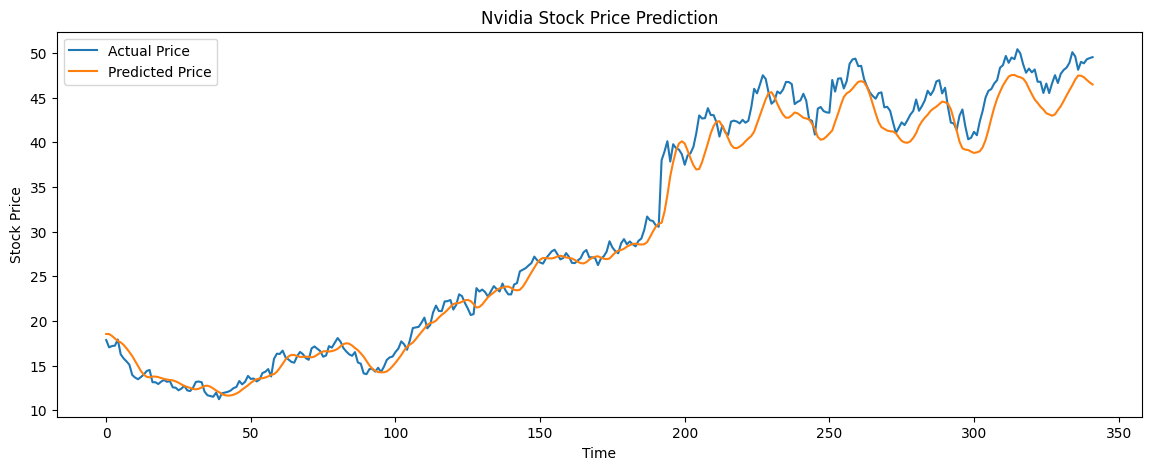

In [12]:
# Predict on test data
predictions = model.predict(X_test)

# Inverse transform the predicted prices to the original scale
predictions = scaler.inverse_transform(predictions)

# Inverse transform the actual prices
y_test_actual = scaler.inverse_transform([y_test])

# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual[0], label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.title('Nvidia Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
